**Prediksi Nilai Akhir Siswa Menggunakan Algoritma Artificial Neural Network dan Random Forest**

In [16]:
# ============================================================
# 1. IMPORT LIBRARY
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Save model
import joblib

In [17]:
uploaded = files.upload()

df = pd.read_csv("student-mat.csv", sep=";")
df.head()

Saving student-mat.csv to student-mat (1).csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [19]:
X = df_encoded.drop("G3", axis=1)
y = df_encoded["G3"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model_ann.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model_ann.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model_ann.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 123.6960 - mae: 10.1239 - val_loss: 107.4651 - val_mae: 9.6658
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 107.8933 - mae: 9.4359 - val_loss: 81.5263 - val_mae: 8.4267
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.0936 - mae: 7.5981 - val_loss: 49.6613 - val_mae: 6.4368
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 44.1680 - mae: 5.8843 - val_loss: 24.4496 - val_mae: 4.2634
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.8079 - mae: 3.9270 - val_loss: 17.4849 - val_mae: 2.9993
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.8175 - mae: 3.4094 - val_loss: 14.3499 - val_mae: 2.6657
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.7263 - mae: 2.9029 - val_loss: 10.7768 - val_mae: 2.4102
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.7636 - mae: 2.6060 - val_loss: 9.5159 - val_mae: 2.4090
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

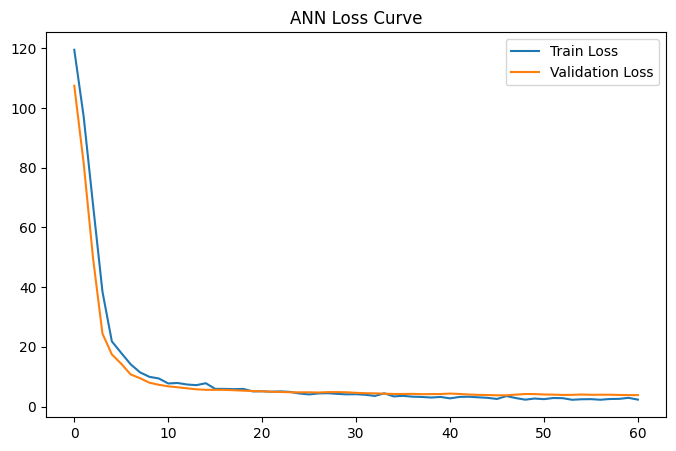

In [23]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("ANN Loss Curve")
plt.show()

In [24]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [25]:
# ANN
y_pred_ann = model_ann.predict(X_test_scaled)

# Random Forest
y_pred_rf = rf_model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [26]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n===== Evaluasi Model: {name} =====")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²    : {r2:.4f}")

evaluate_model("ANN", y_test, y_pred_ann)
evaluate_model("Random Forest", y_test, y_pred_rf)


===== Evaluasi Model: ANN =====
MAE  : 2.1399
MSE  : 7.1020
RMSE : 2.6650
R²    : 0.6536

===== Evaluasi Model: Random Forest =====
MAE  : 1.1706
MSE  : 3.8996
RMSE : 1.9747
R²    : 0.8098


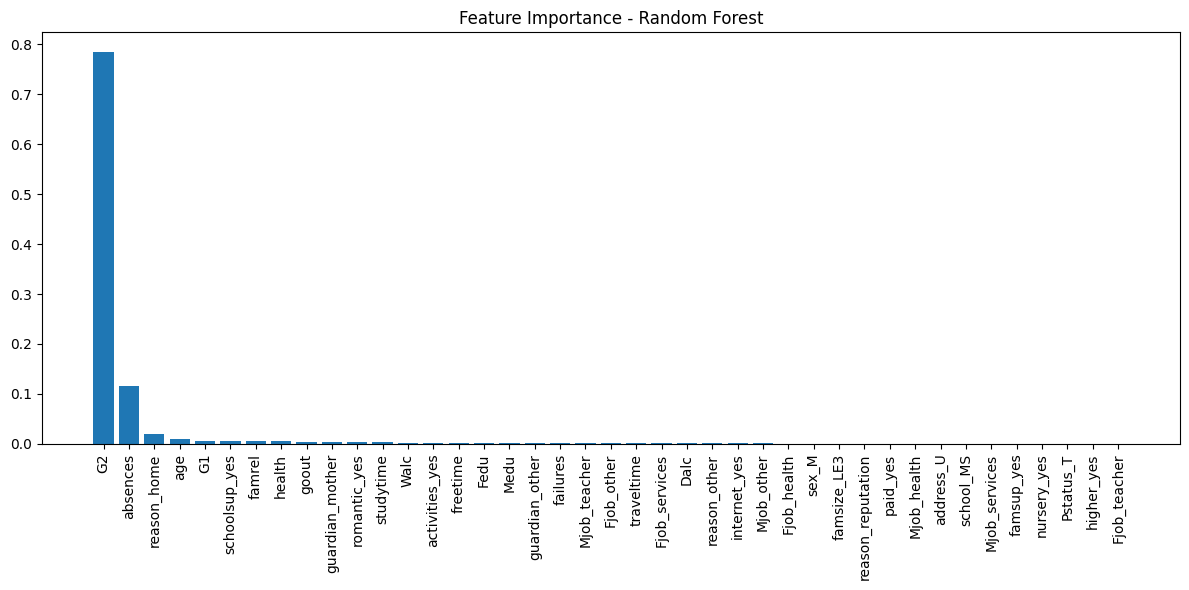

In [27]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [28]:
model_ann.save("model_ann_student_mat.h5")
print("Model ANN berhasil disimpan sebagai model_ann_student_mat.h5")

Model ANN berhasil disimpan sebagai model_ann_student_mat.h5


In [29]:
joblib.dump(rf_model, "random_forest_student_mat.pkl")
print("Model Random Forest berhasil disimpan sebagai random_forest_student_mat.pkl")

Model Random Forest berhasil disimpan sebagai random_forest_student_mat.pkl


In [30]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']